### 1. Fatores que me levam a derrota no League of Legends
<hr>
<p>
O objetivo desta análise é identificar os principais fatores que podem estar contribuindo para minhas derrotas em partidas de League of Legends. Muitas vezes, perder uma partida pode parecer apenas uma questão de azar, mas ao analisar os dados detalhadamente, é possível encontrar padrões e tendências que influenciam no resultado final.
</p>
<p>
Com base no histórico das minhas partidas, pretendo investigar aspectos como desempenho individual, estatísticas dos times, escolha de campeões, controle de objetivos e duração das partidas. A partir desses dados, quero entender quais elementos mais impactam negativamente meu desempenho e o que posso fazer para melhorar minhas chances de vitória.
</p>
<p>
Ao final, essa análise ajudará a tomar decisões mais estratégicas dentro do jogo, seja ajustando meu estilo de jogo, melhorando minhas builds ou até mesmo escolhendo melhor os campeões que jogo com mais frequência.
</p>

### 2. Carregamento e visualização dos dados
<hr>
Importação da biblioteca pandas e do dataset extraido pelo o Script

In [21]:
import pandas as pd

In [42]:
import json

# Carregar o JSON
with open('../dataset/matches_data.json', "r", encoding="utf-8") as file:
    data = json.load(file)

# Converter JSON para DataFrame
df = pd.json_normalize(data)

# Mostrar todas as colunas disponíveis
print(df.columns)

Index(['metadata.dataVersion', 'metadata.matchId', 'metadata.participants',
       'info.endOfGameResult', 'info.gameCreation', 'info.gameDuration',
       'info.gameEndTimestamp', 'info.gameId', 'info.gameMode',
       'info.gameName', 'info.gameStartTimestamp', 'info.gameType',
       'info.gameVersion', 'info.mapId', 'info.participants',
       'info.platformId', 'info.queueId', 'info.teams', 'info.tournamentCode'],
      dtype='object')


In [114]:
# Inspeção dos dados 
df.head()

,metadata.dataVersion,metadata.matchId,metadata.participants,info.endOfGameResult,info.gameCreation,info.gameDuration,info.gameEndTimestamp,info.gameId,info.gameMode,info.gameName,info.gameStartTimestamp,info.gameType,info.gameVersion,info.mapId,info.participants,info.platformId,info.queueId,info.teams,info.tournamentCode
0,2,BR1_3053562713,[1XmXb22FFpU_WgronydRq5HbY7QbID0FYVS-h59IWJ3rl...,GameComplete,1736949266418,1770,1736951141174,3053562713,CLASSIC,teambuilder-match-3053562713,1736949370842,MATCHED_GAME,15.1.649.4112,11,"[{'allInPings': 1, 'assistMePings': 0, 'assist...",BR1,420,"[{'bans': [{'championId': 120, 'pickTurn': 1},...",
1,2,BR1_3053554735,[mOQERp2_3YF6BvM9y7Sy54XO-ryc2Na_3Xc13WyFok1WY...,GameComplete,1736946770221,1769,1736948694088,3053554735,CLASSIC,teambuilder-match-3053554735,1736946924902,MATCHED_GAME,15.1.649.4112,11,"[{'allInPings': 0, 'assistMePings': 1, 'assist...",BR1,420,"[{'bans': [{'championId': -1, 'pickTurn': 1}, ...",
2,2,BR1_3053543004,[dKwozbu_dPUQAST4TU1vt5_LiHUuDGFG29iU4ZLNB216q...,GameComplete,1736938255173,1863,1736940203337,3053543004,CLASSIC,teambuilder-match-3053543004,1736938339948,MATCHED_GAME,15.1.649.4112,11,"[{'allInPings': 1, 'assistMePings': 1, 'assist...",BR1,420,"[{'bans': [{'championId': 32, 'pickTurn': 1}, ...",
3,2,BR1_3053538520,[G6z70rU8gINGEvssmmb4UEZ-kqXPWQTmEoBmfU3jcHqE0...,GameComplete,1736935817708,1718,1736937708851,3053538520,CLASSIC,teambuilder-match-3053538520,1736935990460,MATCHED_GAME,15.1.649.4112,11,"[{'allInPings': 0, 'assistMePings': 15, 'assis...",BR1,420,"[{'bans': [{'championId': 902, 'pickTurn': 1},...",
4,2,BR1_3053539269,[FjH72h_iaS78F6SPkkQ365MgtFebnXyYXVWfEG-QqFsTz...,GameComplete,1736934094197,1072,1736935283527,3053539269,CLASSIC,teambuilder-match-3053539269,1736934211093,MATCHED_GAME,15.1.649.4112,11,"[{'allInPings': 0, 'assistMePings': 2, 'assist...",BR1,420,"[{'bans': [{'championId': 69, 'pickTurn': 1}, ...",


### 2.1 Expliação de cada variável (coluna)
<hr>
O JSON contém duas partes principais:

1. **metadata.\*** → Informações gerais sobre a partida:  
   <br>
   <ol>
       <li><strong>metadata.dataVersion</strong> → Versão do formato de dados da API. Pode mudar conforme a Riot atualiza o sistema.</li>
       <br>
       <li><strong>metadata.matchId</strong> → ID único da partida. Exemplo: <code>BR1_3053562713</code>. Pode ser usado para buscar detalhes da partida depois.</li>
       <br>
       <li><strong>metadata.participants</strong> → Lista de <code>PUUIDs</code> dos jogadores que participaram da partida. O <code>PUUID</code> é um identificador único de cada conta.</li>
       <br>
   </ol>

2. **info.\*** → Estatísticas detalhadas sobre a partida e os jogadores:  
   <br>
   <ol>
       <li><strong>info.endOfGameResult</strong> → Resultado final da partida. Pode indicar vitória, derrota ou outros estados do jogo.</li>
       <br>
       <li><strong>info.gameCreation</strong> → Timestamp (milissegundos) indicando <strong>quando a partida foi criada</strong> (momento do lobby).</li>
       <br>
       <li><strong>info.gameDuration</strong> → Duração da partida em <strong>segundos</strong>. Exemplo: <code>1800</code> significa <strong>30 minutos de jogo</strong>.</li>
       <br>
       <li><strong>info.gameEndTimestamp</strong> → Timestamp indicando <strong>quando a partida terminou</strong>.</li>
       <br>
       <li><strong>info.gameId</strong> → Outro identificador único da partida (igual ao <code>metadata.matchId</code>).</li>
       <br>
       <li><strong>info.gameMode</strong> → O modo de jogo da partida. Exemplos: <code>"CLASSIC"</code> (Summoner’s Rift), <code>"ARAM"</code>, <code>"URF"</code>, <code>"ONEFORALL"</code>.</li>
       <br>
       <li><strong>info.gameName</strong> → Nome interno da partida (pouco usado). Pode ser útil para modos personalizados.</li>
       <br>
       <li><strong>info.gameStartTimestamp</strong> → Timestamp indicando <strong>quando o jogo começou</strong>, diferente de <code>gameCreation</code>, que é quando o lobby foi criado.</li>
       <br>
       <li><strong>info.gameType</strong> → Tipo do jogo. Exemplo: <code>"MATCHED_GAME"</code> (partidas normais/rankeds), <code>"CUSTOM_GAME"</code> (partida personalizada).</li>
       <br>
       <li><strong>info.gameVersion</strong> → Versão do jogo na época da partida. Exemplo: <code>"14.1.1"</code> (Patch 14.1).</li>
       <br>
       <li><strong>info.mapId</strong> → ID do mapa jogado. Exemplos: <code>11</code> (Summoner’s Rift), <code>12</code> (ARAM), <code>21</code> (Howling Abyss).</li>
       <br>
       <li><strong>info.participants</strong> → <strong>Lista com detalhes de cada jogador</strong> da partida. Inclui estatísticas como kills, ouro, itens comprados, etc.</li>
       <br>
       <li><strong>info.platformId</strong> → Servidor onde a partida foi jogada. Exemplos: <code>"BR1"</code> (Brasil), <code>"NA1"</code> (América do Norte), <code>"EUW1"</code> (Europa Oeste).</li>
       <br>
       <li><strong>info.queueId</strong> → ID da fila de matchmaking. Exemplos: <code>420</code> (Ranked Solo/Duo), <code>440</code> (Ranked Flex), <code>450</code> (ARAM), <code>900</code> (URF).</li>
       <br>
       <li><strong>info.teams</strong> → <strong>Lista com estatísticas de cada time</strong> (azul e vermelho). Inclui informações como torres destruídas, dragões e barões abatidos.</li>
       <br>
       <li><strong>info.tournamentCode</strong> → Código do torneio, se a partida fizer parte de um evento organizado. Normalmente <code>null</code> para partidas normais.</li>
       <br>
   </ol>

As colunas que vão ser levadas em consideração para o estudo, serão: <strong>info.gameMode, info.participants, info.teams, info.gameDuration, info.endOfGameResult</strong>

### 2.2 Inspecionando os dados
<hr>

In [59]:
# Selecionando apenas as colunas relevantes para a análise
df_partidas = df[["info.gameMode", "info.participants", "info.teams", "info.gameDuration", "info.endOfGameResult"]]

# Renomeando as colunas para facilitar o uso
df_partidas = df_partidas.rename(columns={
    "info.gameMode": "game_mode",
    "info.participants": "participants",
    "info.teams": "teams",
    "info.gameDuration": "game_duration",
    "info.endOfGameResult": "game_result"
})

In [73]:
# O número total de vitórias e derrotas
print("Distribuição de Resultados das Partidas:")
print(df_partidas["game_result"].value_counts())

Distribuição de Resultados das Partidas:
game_result
GameComplete        948
Abort_Unexpected      6
Name: count, dtype: int64


In [71]:
# Uma função para extrair estatísticas individuais dos jogadores
def extrair_estatisticas(participants):
    meu_puuid = "n6tXroIhiXe8wLWPBM1j6BV6vq9VNztTEGZLMCFL5WINy7Dr6rQOD5NaVQYlsNrkKwYCSDBf9i5HCA" 
    for p in participants:
        if p["puuid"] == meu_puuid:
            return {
                "champion": p["championName"],
                "role": p["role"],
                    "lane": p["lane"],
                "kills": p["kills"],
                "deaths": p["deaths"],
                "assists": p["assists"],
                "gold_earned": p["goldEarned"],
                "total_minions_killed": p["totalMinionsKilled"],
                "win": p["win"]
            }
    return None

In [ ]:
# Aplicar a função e criar um novo DataFrame com os dados individuais
df_jogador = df_partidas["participants"].apply(extrair_estatisticas).apply(pd.Series)

# Juntando os dados individuais ao DataFrame principal
df_partidas = pd.concat([df_partidas, df_jogador], axis=1)

# Filtrando apenas as partidas perdidas
df_derrotas = df_partidas[df_partidas["win"] == False]

In [102]:
# Estatísticas médias das partidas perdidas
print("\n📉 Estatísticas Médias nas Derrotas:")
print(df_derrotas[["kills", "deaths", "assists", "gold_earned", "total_minions_killed"]].mean())

# Contagem de derrotas por campeão jogado
print("\n⚔️ Campeões com mais derrotas:")
print(df_derrotas["champion"].value_counts().head(5))

# Contagem de derrotas por modo de jogo
print("\n🎮 Modos de jogo com mais derrotas:")
print(df_derrotas["game_mode"].value_counts())

# Contagem de quantidade total de derrotas 
print('\n🎯A quantidade de partidas perdidas:')
print(df_derrotas["game_mode"].count())

# Contagem de derrotas por lane
print("\n🛤️ Lanes com mais derrotas:")
print(df_derrotas["lane"].value_counts())

# Ver relação entre tempo de jogo e derrota
print("\n⏳ Duração Média das Partidas Perdidas:")
print(df_derrotas["game_duration"].mean(), "segundos")



📉 Estatísticas Médias nas Derrotas:
kills                      4.367063
deaths                     7.115079
assists                   11.319444
gold_earned             9528.269841
total_minions_killed      94.140873
dtype: float64

⚔️ Campeões com mais derrotas:
champion
Nami       63
Morgana    45
Lux        42
Janna      34
Karma      27
Name: count, dtype: int64

🎮 Modos de jogo com mais derrotas:
game_mode
CLASSIC       410
ARAM           61
STRAWBERRY     15
URF             8
CHERRY          6
ULTBOOK         3
ONEFORALL       1
Name: count, dtype: int64

🎯A quantidade de partidas perdidas:
504

🛤️ Lanes com mais derrotas:
lane
BOTTOM    253
NONE       92
MIDDLE     79
JUNGLE     54
TOP        26
Name: count, dtype: int64

⏳ Duração Média das Partidas Perdidas:
1567.5257936507937 segundos


### 3. Análises Iniciais - Análise Exploratória para Identificar Padrões e Relações  
<hr>  

O que faremos:  
<ol>
    <li>Analisar a relação entre número de mortes e derrotas para identificar se estou jogando de forma muito agressiva ou insegura.</li>
    <li>Identificar quais campeões apresentam maior taxa de derrotas e avaliar se devo reconsiderar minha pool de campeões.</li>
    <li>Verificar se o tempo de jogo influencia as derrotas, analisando se partidas mais longas aumentam minhas chances de perder.</li>
    <li>Comparar meu desempenho entre diferentes lanes para entender onde estou tendo mais dificuldades.</li>
</ol>

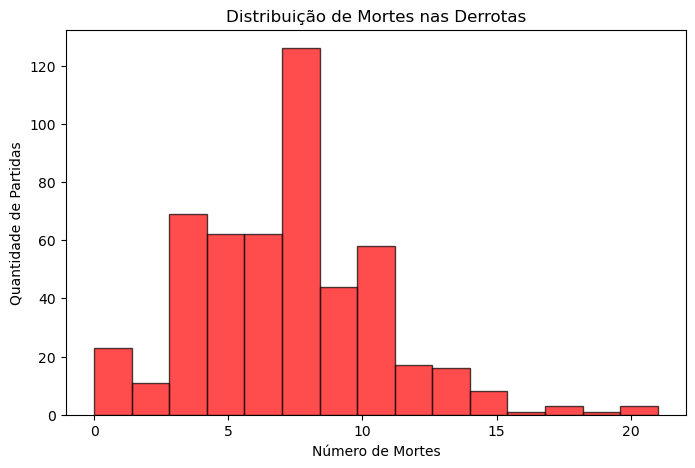

In [107]:
import matplotlib.pyplot as plt  

# Criar um histograma para visualizar a distribuição de mortes nas derrotas  
plt.figure(figsize=(8,5))
plt.hist(df_derrotas["deaths"], bins=15, color="red", edgecolor="black", alpha=0.7)
plt.xlabel("Número de Mortes")
plt.ylabel("Quantidade de Partidas")
plt.title("Distribuição de Mortes nas Derrotas")
plt.show()

📌 Insight: A maioria das derrotas tem muitas mortes, o que indica que é necessário jogar de forma mais segura.
<hr>

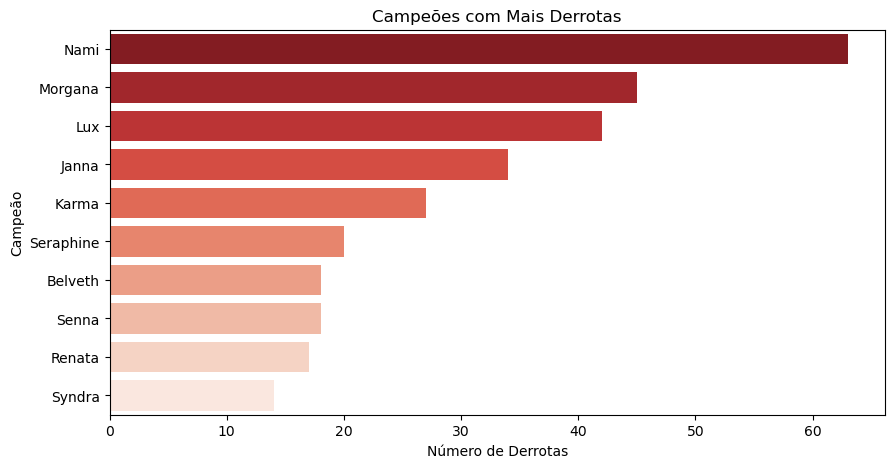

In [137]:
import seaborn as sns

# Contar quantas derrotas ocorreram por campeão
derrotas_por_campeao = df_derrotas["champion"].value_counts().head(10)

# Criar um gráfico de barras
plt.figure(figsize=(10,5))

sns.barplot(
    x=derrotas_por_campeao.values, 
    y=derrotas_por_campeao.index, 
    hue=derrotas_por_campeao.index,  
    palette="Reds_r", 
    legend=False  
)
plt.xlabel("Número de Derrotas")
plt.ylabel("Campeão")
plt.title("Campeões com Mais Derrotas")
plt.show()

📌 Insight: Eu perco muito com a Nami, Morgana e Lux, o que significa que devo escolher outros champions se desejo buscar menos derrotas.
<hr>

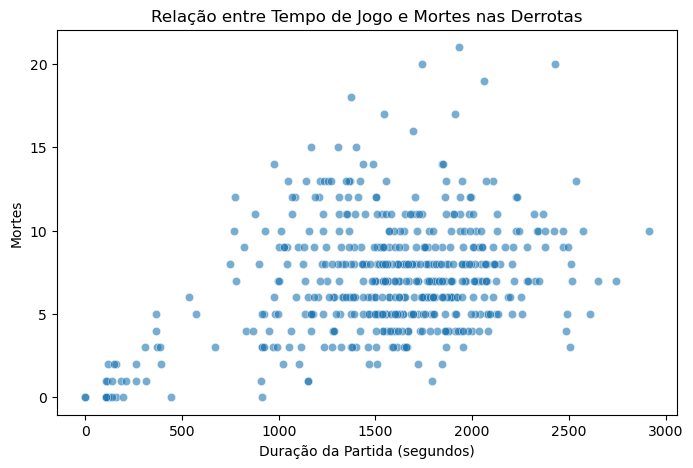

In [142]:
import seaborn as sns  

# Criar um gráfico de dispersão (scatter plot) para tempo de jogo x mortes  
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_derrotas["game_duration"], y=df_derrotas["deaths"], alpha=0.6)
plt.xlabel("Duração da Partida (segundos)")
plt.ylabel("Mortes")
plt.title("Relação entre Tempo de Jogo e Mortes nas Derrotas")
plt.show()

📌 Insight: 

1. Partidas mais curtas geralmente resultam em menos mortes, mas isso não significa que sejam melhores. Se eu estou perdendo rápido, isso significa que estou sendo dominado logo no início.

2. A maioria das derrotas ocorre em partidas entre 1000 e 2000 segundos (16 a 33 minutos), indicando que este pode ser o ponto crítico para evitar snowball adversário.

3. Para jogos mais longos, o número de mortes varia muito, sugerindo que problemas estratégicos podem estar impactando a fase final das partidas.

O que significa que devo revisar o early game, focando em evitar mortes desnecessárias nos primeiros 15 minutos. Melhorar a transição para o mid/late game, garantindo que menos erros ocorram entre 16 e 33 minutos.
<hr>

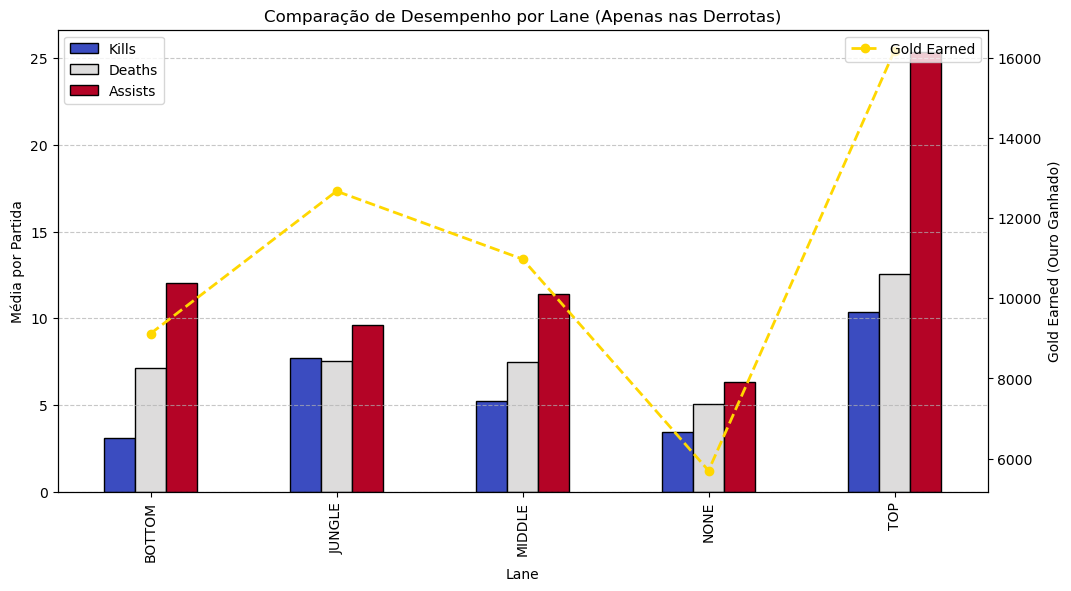

In [158]:
# Agrupar os dados por lane e calcular as estatísticas médias
df_lane = df_derrotas.groupby("lane")[["kills", "deaths", "assists", "gold_earned"]].mean()

# Criar a figura e os dois eixos
fig, ax1 = plt.subplots(figsize=(12, 6))

# Criar o gráfico de kills, deaths e assists no eixo principal
df_lane[["kills", "deaths", "assists"]].plot(kind="bar", ax=ax1, colormap="coolwarm", edgecolor="black")
ax1.set_xlabel("Lane")
ax1.set_ylabel("Média por Partida")
ax1.set_title("Comparação de Desempenho por Lane (Apenas nas Derrotas)")
ax1.legend(["Kills", "Deaths", "Assists"], loc="upper left")
ax1.tick_params(axis="y")

# Criar um segundo eixo Y para o gold_earned
ax2 = ax1.twinx()
df_lane["gold_earned"].plot(kind="line", ax=ax2, color="gold", marker="o", linewidth=2, linestyle="--")
ax2.set_ylabel("Gold Earned (Ouro Ganhado)")
ax2.legend(["Gold Earned"], loc="upper right")
ax2.tick_params(axis="y")

# Melhorar a aparência
plt.xticks(rotation=0)  # Deixar os nomes das lanes horizontais
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()

📌 Insight:

A lane TOP tem a maior média de ouro ganho, sugerindo que os campeões jogados nessa posição conseguem farmar melhor ou permanecer mais tempo na partida, mesmo em derrotas.

A lane BOTTOM apresenta menos kills e mais assistências, indicando que a atuação nessa posição depende mais do time, o que pode tornar difícil virar jogos quando há desvantagem.

O alto número de mortes em BOTTOM e MIDDLE sugere que estou sendo muito punido nessas rotas, o que pode ser um fator crítico nas derrotas.

Isso significa que devo melhorar minha sobrevivência em Bottom e Mid, focando em posicionamento e tomada de decisões. Além disso, devo otimizar minha geração de ouro nessas lanes para ter mais impacto no jogo, mesmo quando estou atrás.
<hr>

### 4. Análise das visualizações - Análise Final
<hr>

É muito complexo determinar exatamente o que leva a uma derrota em um jogo online como League of Legends. Fatores externos, como jogadores AFK, trolls e diferenças de habilidade no matchmaking, podem impactar os resultados de forma imprevisível. No entanto, com base na análise dos meus dados, foi possível identificar padrões e ajustes que podem reduzir a frequência das derrotas e melhorar minha performance.

Os dados mostram que minhas derrotas ocorrem, em média, com 4.37 kills, 7.11 mortes e 11.32 assistências, resultando em um KDA baixo, especialmente devido ao alto número de mortes. O fato de os campeões com mais derrotas serem suportes (Nami, Morgana, Lux, Janna e Karma) pode indicar dificuldade em carregar partidas ou falta de impacto no time.

O modo onde mais perco é CLASSIC (410 derrotas), o que faz sentido, pois é o modo que mais jogo. No entanto, a lane com mais derrotas é BOTTOM (253 derrotas), reforçando que meus maiores desafios estão nessa posição. Além disso, a duração média das partidas perdidas é 1567 segundos (~26 minutos), indicando que minha transição do mid para o late game pode ser um problema, dificultando a finalização de jogos quando estou na vantagem.

Para melhorar minha taxa de vitórias, preciso reduzir o número de mortes, principalmente no early game, para evitar snowball adversário. Além disso, é essencial aprimorar minha tomada de decisões no mid e late game, garantindo que eu consiga fechar jogos quando estiver na vantagem. Também devo ajustar minha abordagem jogando de suporte, buscando campeões que possam ter mais impacto direto na vitória.

Por fim, melhorar minha geração de ouro será fundamental, pois partidas mais longas exigem um melhor aproveitamento de recursos para ser decisivo no late game. Embora nem todas as derrotas possam ser evitadas, minimizar esses erros pode aumentar minha taxa de vitórias e tornar minha performance mais consistente.